# Research Questions
How do demographic, behavioral, and medical factors influence the 10-year risk of coronary heart disease (CHD), and can these factors be effectively modeled using logistic regression to provide insights for risk assessment and potential intervention strategies?

# Data Description

## Dependent Variable
`TenYearCHD`: 10 year risk of coronary heart disease CHD (1=Yes, 0=No)

## Independent Variables

Demographic:
* `male`: 1=male, 0=female
* `age`: age of the patient
* `education`: attained education (1=0-11 years, 2=High School Diploma, GED, 3=Some College, Vocational School, 4=College (BS, BA) degree or more) 

Behavioral:
* `currentSmoker`: whether or not the patient is a current smoker (0=Not current smoker, 1=Current smoker)
* `cigsPerDay`: the number of cigarettes that the person smoked on average in one day

Medical History:
* `BPMeds`: whether or not the patient was on blood pressure medication (0=Not currently used, 1=Current Use)
* `prevalentStroke`: whether or not the patient had previously had a stroke (0=Free of disease, 1=Prevalent disease)
* `prevalentHyp`: whether or not the patient was hypertensive (0=Free of disease, 1=Prevalent disease)
* `diabetes`: whether or not the patient had diabetes (0=Not diabetic, 1=Diabetic)

Current Medical Information:
* `totChol`: total cholesterol level
* `sysBP`: systolic blood pressure
* `diaBP`: diastolic blood pressure
* `BMI`: Body Mass Index
* `heartRate`: heart rate
* `glucose`: glucose level

In [1]:
# Import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import optimize

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Import the dataset

data = pd.read_csv('framingham.csv')
data.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


# Exploratory Data Analysis

In [3]:
# Check for missing values

data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [4]:
# Drop the missing values

data = data.dropna()

In [5]:
# Descriptive statistics

data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000,3656.000000
mean,0.443654,49.557440,1.979759,0.489059,9.022155,0.030361,0.005744,0.311543,0.027079,236.873085,132.368025,82.912062,25.784185,75.730580,81.856127,0.152352
std,0.496883,8.561133,1.022657,0.499949,11.918869,0.171602,0.075581,0.463187,0.162335,44.096223,22.092444,11.974825,4.065913,11.982952,23.910128,0.359411
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.080000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.250000,144.000000,90.000000,28.040000,82.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


From the descriptive statistics, we can see that the continuous variables have different values of mean and standard deviation. Therefore, standardizing these variables would make their coefficients comparable.

In [6]:
# Write a function to standardize the values in a column

def standardize(data, column):
    var_mean = data[column].mean()
    var_std = data[column].std()
    data[column] = round((data[column]-var_mean)/var_std, 6)

    return data[column]

# Apply different columns to the standardize function

data['age'] = standardize(data, "age")
data['cigsPerDay'] = standardize(data, "cigsPerDay")
data['totChol'] = standardize(data, "totChol")
data['sysBP'] = standardize(data, "sysBP")
data['diaBP'] = standardize(data, "diaBP")
data['BMI'] = standardize(data, "BMI")
data['heartRate'] = standardize(data, "heartRate")
data['glucose'] = standardize(data, "glucose")


data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,-1.233182,4.0,0,-0.756964,0.0,0,0,0,-0.949584,-1.193531,-1.078267,0.291648,0.356291,-0.203099,0
1,0,-0.415534,2.0,0,-0.756964,0.0,0,0,0,0.297688,-0.514566,-0.159674,0.724515,1.608070,-0.244922,0
2,1,-0.181920,1.0,1,0.921048,0.0,0,0,0,0.184300,-0.220348,-0.243182,-0.109246,-0.060968,-0.495862,0
3,0,1.336571,3.0,1,1.760053,0.0,0,1,0,-0.269254,0.798100,1.009446,0.687623,-0.895487,0.884306,1
4,0,-0.415534,3.0,1,1.172749,0.0,0,0,0,1.091407,-0.107187,0.090852,-0.660168,0.773551,0.131487,0


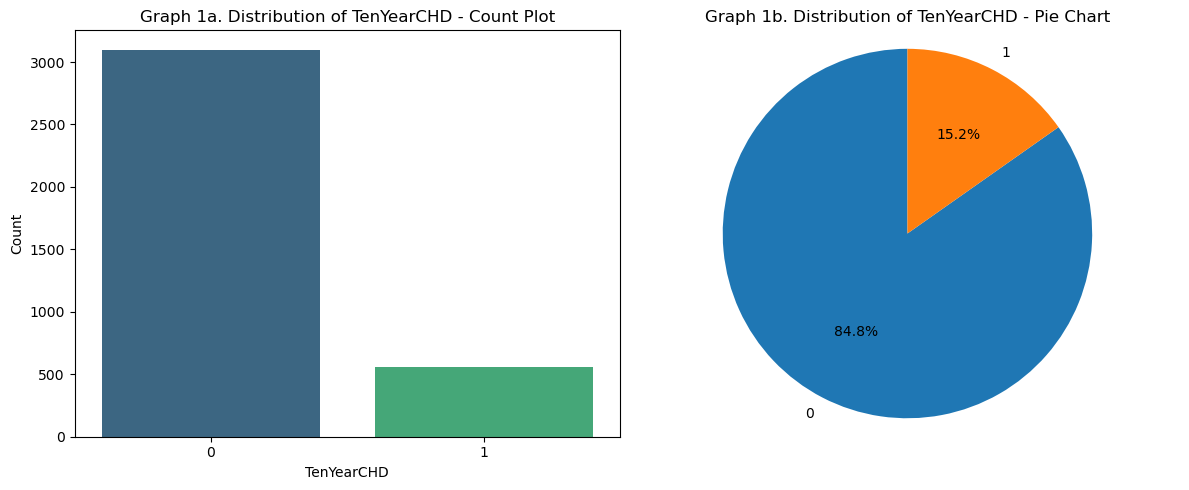

In [7]:
# Distribution of the dependent variable using both count plot and pie chart

# Set up a figure with two subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Graph 1: Count plot
sns.countplot(x='TenYearCHD', data=data, palette='viridis', ax=axes[0])
axes[0].set_xlabel('TenYearCHD')
axes[0].set_ylabel('Count')
axes[0].set_title('Graph 1a. Distribution of TenYearCHD - Count Plot')

# Graph 2: Pie chart
labels = data['TenYearCHD'].value_counts().index
sizes = data['TenYearCHD'].value_counts().values
colors = ['#1f77b4', '#ff7f0e']

axes[1].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Graph 1b. Distribution of TenYearCHD - Pie Chart')
axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the combined figure
plt.show()

According to Graphs 1a and 1b, most of the subjects (84.4%) do not have the 10-year risk of CHD. However, as we are looking at an illness, 15.2% of the studied population having that risk is considerable.

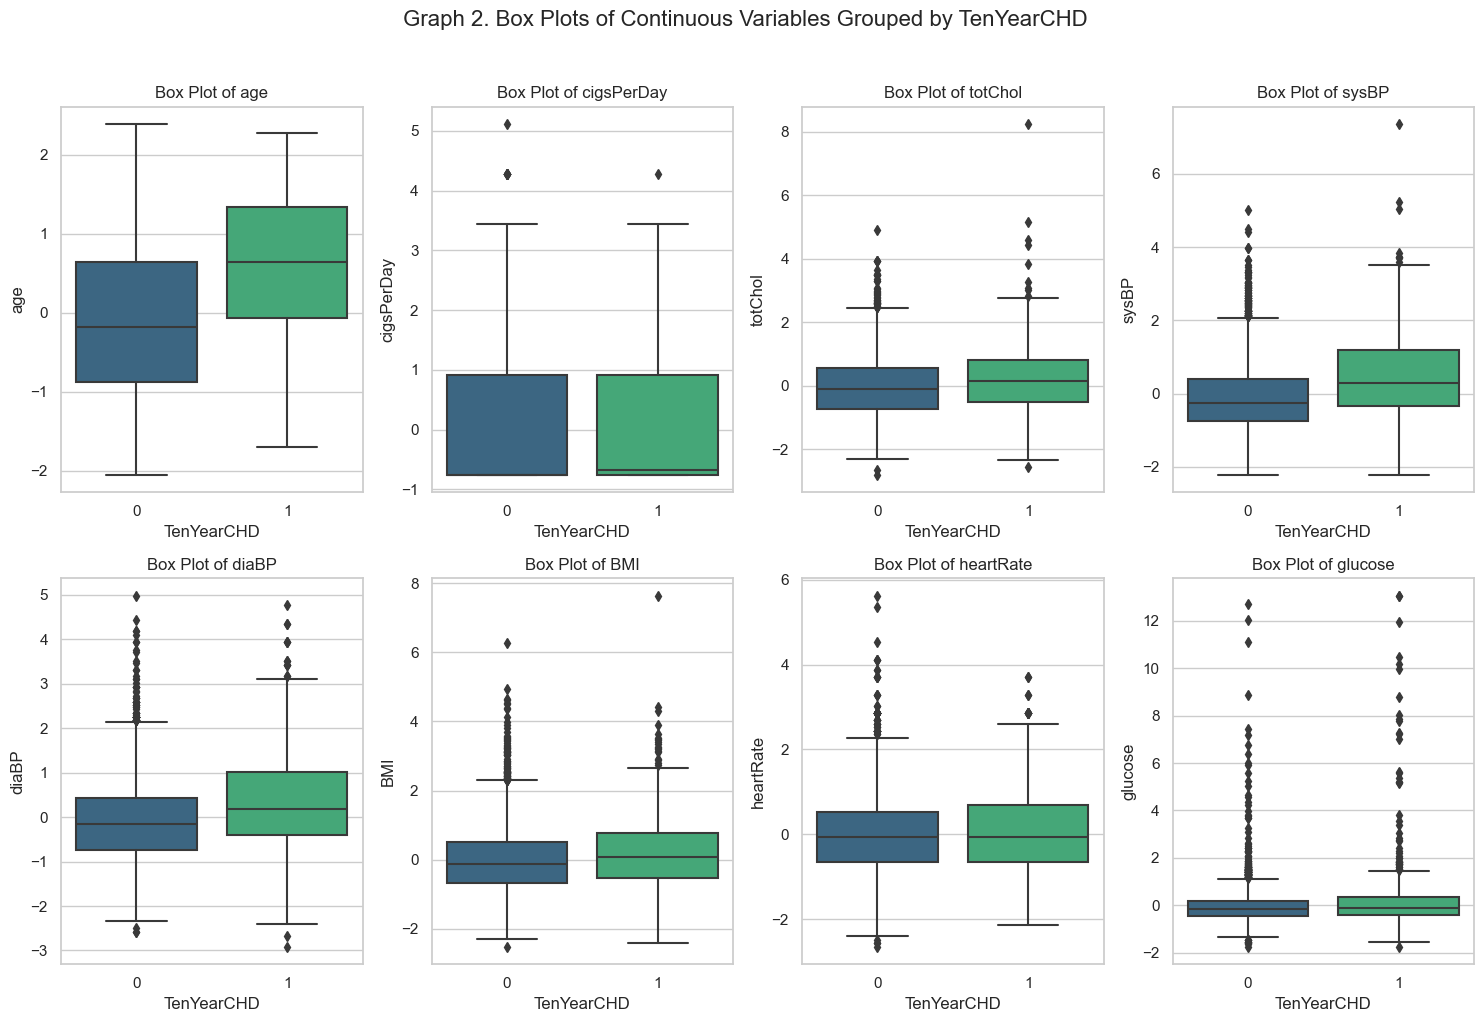

In [8]:
# Distribution of continuous variables

# Write a function to draw box plots of continuous independent variables

def draw_box_plots(data, continuous_vars, target_var):
    """
    Draw box plots for different continuous variables grouped by the target variable.

    Parameters:
    - data: DataFrame
    - continuous_vars: List of continuous variable names
    - target_var: Name of the dependent variable (categorical)

    Returns:
    - None (Plots are displayed)
    """
    # Set style
    sns.set(style="whitegrid")

    # Create subplots
    plt.figure(figsize=(15, 5 * 2))

    # Loop through continuous variables
    for i, var in enumerate(continuous_vars, 1):
        plt.subplot(2,4,i)
        sns.boxplot(x=target_var, y=var, data=data, palette='viridis')
        plt.title(f'Box Plot of {var}')

    plt.suptitle(f' Graph 2. Box Plots of Continuous Variables Grouped by {target_var}', y=1.02, fontsize=16)
    plt.tight_layout()
    plt.show()

# Make a list of continuous variables and run the function

continuous_vars = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 
                   'glucose']
target_var = 'TenYearCHD'

draw_box_plots(data, continuous_vars, target_var)

According to Graph 2, we can make these observations:
* Approximately 75% of individuals with a 10-year risk of CHD have an age exceeding the median age of the studied population.
* The variables `cigsPerDay`, `totChol`, `BMI`, `heartRate`, and `glucose` exhibit seemingly similar distributions across the two different groups.
* Many variables display the presence of outliers.

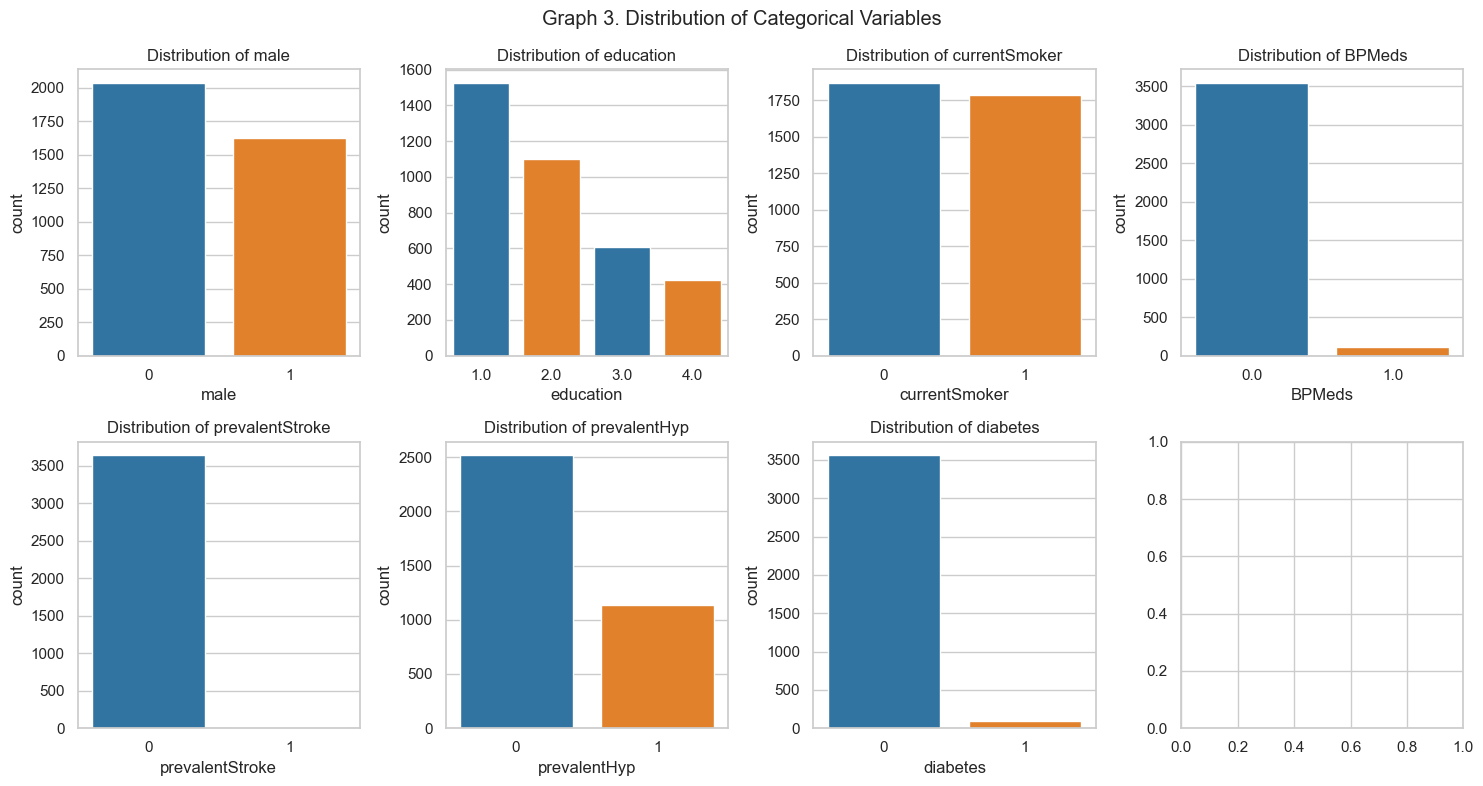

In [9]:
# Distribution of categorical variables

categorical_vars = ['male', 'education', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

# Set up a grid of subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))
axes = axes.flatten()

# Plot count plots for each categorical variable
for i, variable in enumerate(categorical_vars):
    sns.countplot(x=variable, data=data, ax=axes[i], palette=['#1f77b4', '#ff7f0e'])
    axes[i].set_title(f'Distribution of {variable}')

plt.suptitle('Graph 3. Distribution of Categorical Variables')
plt.tight_layout()
plt.show()

According to Graph 3, we can make these observations:
* There are more female subjects than male subjects; however, the difference is not so significant.
* The distribution among current smokers and non-smokers appears almost equal.
* There is no recorded incidence of prevalent stroke among the studied population.
* A small proportion of subjects have diabetes.
* A minority of subjects are documented to be on blood pressure medication.

Let's also check the correlation among independent variables to avoid multicolliearity in the model that will be used.

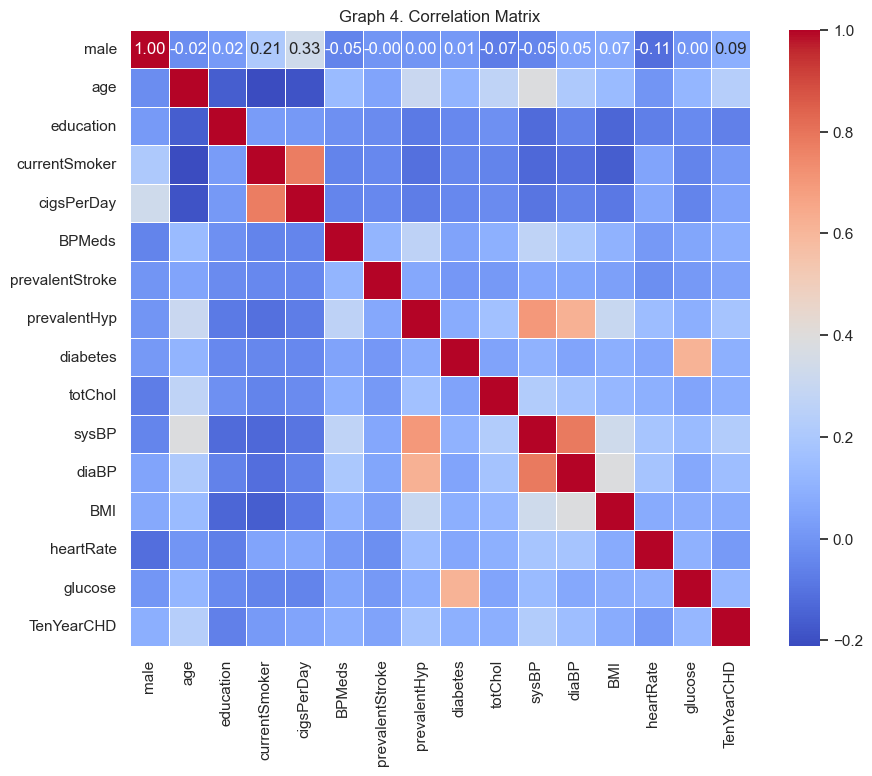

In [10]:
# Define the independent variables
independent_vars = ['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

# Extract the features and target variable
subset_data = data[independent_vars + [target_var]]

# Compute the correlation matrix
correlation_matrix = subset_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title('Graph 4. Correlation Matrix')
plt.show()


According to the correlation matrix presented in Graph 4, we observe a correlation between `currentSmoker` and `cigsPerDay`, which is expected, as non-smokers typically have zero cigarettes per day. `sysBP` and `diaBP` are correlated with each other and with `prevalentHyp`. The level of glucose is correlated with whether the individual had diabetes or not, which is also expected. These correlations can be neglected in this study.

# Method
This project uses logistic regression to identify the impact of the independent variables on 10-year risk of CHD. It then calculates the marginal effects of these variables on outcome.

# Data Analysis
First, a column of 1s, named `intercept` is added to the dataset to be used later in the model.
Next, `data_logit` is created with `intercept` being the first column and the dependent variable `TenYearCHD` being the last column.

In [11]:
# Create data_logit for logistic regression

data['intercept'] = 1
data_logit = data[['intercept', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
data_logit

,intercept,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,1,-1.233182,4.0,0,-0.756964,0.0,0,0,0,-0.949584,-1.193531,-1.078267,0.291648,0.356291,-0.203099,0
1,1,0,-0.415534,2.0,0,-0.756964,0.0,0,0,0,0.297688,-0.514566,-0.159674,0.724515,1.608070,-0.244922,0
2,1,1,-0.181920,1.0,1,0.921048,0.0,0,0,0,0.184300,-0.220348,-0.243182,-0.109246,-0.060968,-0.495862,0
3,1,0,1.336571,3.0,1,1.760053,0.0,0,1,0,-0.269254,0.798100,1.009446,0.687623,-0.895487,0.884306,1
4,1,0,-0.415534,3.0,1,1.172749,0.0,0,0,0,1.091407,-0.107187,0.090852,-0.660168,0.773551,0.131487,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4231,1,1,0.986150,3.0,0,-0.756964,0.0,0,1,0,-1.131006,0.390721,-0.159674,-0.202706,0.356291,-0.035806,0
4232,1,1,2.154219,1.0,0,-0.756964,0.0,0,1,0,-1.380460,1.612858,1.176463,-0.650330,-1.312747,-0.119453,1
4233,1,1,0.051694,1.0,1,-0.673063,0.0,0,1,0,1.726382,2.110766,0.758920,0.045701,-0.812035,0.173310,1
4234,1,1,0.168501,3.0,1,2.850761,0.0,0,0,0,-0.677452,-0.265612,-0.243182,-1.493929,-0.895487,-0.579509,0


In [12]:
# Transform data_logit from pandas dataframe to numpy array 
data_logit = np.array(data_logit)
data_logit

array([[ 1.      ,  1.      , -1.233182, ...,  0.356291, -0.203099,
         0.      ],
       [ 1.      ,  0.      , -0.415534, ...,  1.60807 , -0.244922,
         0.      ],
       [ 1.      ,  1.      , -0.18192 , ..., -0.060968, -0.495862,
         0.      ],
       ...,
       [ 1.      ,  1.      ,  0.051694, ..., -0.812035,  0.17331 ,
         1.      ],
       [ 1.      ,  1.      ,  0.168501, ..., -0.895487, -0.579509,
         0.      ],
       [ 1.      ,  0.      ,  0.285308, ...,  0.356291,  1.051599,
         0.      ]])

## Manual Optimization

First, we define the `sigmoid` function that calculates representative utility V_n1 from data and vector of parameters.

In [13]:
def sigmoid_mn(data, beta):
    # We first calculate representative utility for data and parameter vector

    # Data has dimensions l x m where l is how many observations we have and
    # m is how many explanatory variables we have including intercept

    # beta has m x a where m is the same as above (number of parameters we are trying to fit)
    # While a is how many alternatives we have in choice model
    Xb = np.dot(data, beta)

    # Now we calculate probaility based on sigmoid function
    # We add [:, None] to make sure eXb.sum(1) is two dimenstional instead of one dimensionalto allow elementwise division
    eXb = np.exp(Xb)
    eXb = eXb /eXb.sum(1)[:, None]
    return eXb

Secondly, we define the loglikelihood function that calculates probability for a given representative utility value.

In [14]:
def LL_mn(params, *args):
    # Unpack args
    y, X, n_params, n_classes = args[0], args[1], args[2], args[3]

    # Define beta that we later estimate
    beta = params

    # Reshape so that when we multiply data with beta correct elements are multiplied to each other
    beta = np.array(beta).reshape(n_params, -1, order='F')

    # Ensure that we're only fitting J-1 parameter sets
    beta[:,0] = [0]*n_params

    # Create dummy variebles for decisions made
    d = pd.get_dummies(y).to_numpy()

    probs = sigmoid_mn(X, beta)
    logged = np.log(probs)
    ll = d * logged

    return -np.sum(ll)

In [15]:
# Optimization

n_params = 16
n_classes = 2

starting_values = np.random.rand(n_params*n_classes)

optimize.minimize(LL_mn, x0 = starting_values, args = (data_logit[:, -1], data_logit[:, :-1], n_params, n_classes))['x']

array([ 0.58163258,  0.0950209 ,  0.94020031,  0.1541738 ,  0.24486353,
        0.09327416,  0.49727445,  0.56283484,  0.53641246,  0.15204762,
        0.56281679,  0.35833516,  0.4049925 ,  0.84172125,  0.41242712,
        0.51589906, -2.26249404,  0.55509752,  0.54323248, -0.04749707,
        0.0708754 ,  0.21369702,  0.1622554 ,  0.69350134,  0.23463779,
        0.0394617 ,  0.10247633,  0.34017742, -0.04948141,  0.02684709,
       -0.03893865,  0.17033378])

## Optimization Using Python Package

In [16]:
# Use Python's statsmodels package to get logistic regression results

features = ['intercept', 'male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

log_reg = sm.Logit(data_logit[:, 16], data_logit[:, :16]).fit(maxiter=1000)
log_reg.summary(xname=features)

Optimization terminated successfully.
         Current function value: 0.376668
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 3656
Model:                          Logit   Df Residuals:                     3640
Method:                           MLE   Df Model:                           15
Date:                Mon, 11 Mar 2024   Pseudo R-squ.:                  0.1174
Time:                        22:31:16   Log-Likelihood:                -1377.1
converged:                       True   LL-Null:                       -1560.3
Covariance Type:            nonrobust   LLR p-value:                 8.027e-69
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
intercept          -2.2625      0.155    -14.644      0.000      -2.565      -1.960
male                0.5551      0.109      5.090      0.000       0.341       0.769
age                 0.5432      0.057      9.499      0.000       0.431       0.655
education          -0.0475      0.049     -0.962      0.336      -0.144       0.049
currentSmoker       0.0709      0.157      0.452      0.651      -0.236       0.378
cigsPerDay          0.2137      0.074      2.874      0.004       0.068       0.359
BPMeds              0.1623      0.234      0.692      0.489      -0.297       0.621
prevalentStroke     0.6935      0.490      1.417      0.157      -0.266       1.653
prevalentHyp        0.2346      0.138      1.700      0.089      -0.036       0.505
diabetes            0.0395      0.315      0.125      0.900      -0.579       0.658
totChol             0.1025      0.050      2.062      0.039       0.005       0.200
sysBP               0.3402      0.084      4.043      0.000       0.175       0.505
diaBP              -0.0495      0.077     -0.642      0.521      -0.201       0.102
BMI                 0.0268      0.052      0.518      0.605      -0.075       0.129
heartRate          -0.0389      0.050     -0.772      0.440      -0.138       0.060
glucose             0.1703      0.053      3.189      0.001       0.066       0.275
===================================================================================
"""

We can see that manual optimization and using Python package yield similar results.

Next, let's find out the marginal effects of the independent variables on the outcome variable.

In [17]:
# Get marginal effects

log_reg.get_margeff(at = 'zero').summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
        Logit Marginal Effects       
=====================================
Dep. Variable:                      y
Method:                          dydx
At:                              zero
==============================================================================
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0474      0.009      5.270      0.000       0.030       0.065
x2             0.0464      0.007      6.775      0.000       0.033       0.060
x3            -0.0041      0.005     -0.892      0.373      -0.013       0.005
x4             0.0061      0.013      0.465      0.642      -0.019       0.032
x5             0.0182      0.008      2.414      0.016       0.003       0.033
x6             0.0139      0.020      0.691      0.490      -0.025       0.053
x7             0.0592      0.042      1.403      0.161      -0.024       0.142
x8             0.0200      0.011      1.768      0.077      -0.002       0.042
x9             0.0034      0.027      0.125      0.900      -0.049       0.056
x10            0.0088      0.004      2.020      0.043       0.000       0.017
x11            0.0290      0.008      3.620      0.000       0.013       0.045
x12           -0.0042      0.007     -0.645      0.519      -0.017       0.009
x13            0.0023      0.004      0.520      0.603      -0.006       0.011
x14           -0.0033      0.004     -0.766      0.444      -0.012       0.005
x15            0.0145      0.005      2.952      0.003       0.005       0.024
==============================================================================
"""

# Findings
* Setting the significance level at 0.05, these variables are statistically significant: `male`, `age`, `cigsPerDay`, `totChol`, `sysBP`, `glucose`.
* Specifically, being male is associated with an increased likelihood of experiencing the 10-year risk of CHD. `age` exhibited a positive correlation, indicating that as individuals age, their likelihood of facing the 10-year risk of CHD also rises. Smoking habits, represented by the variable `cigsPerDay`, showed a positive relationship, suggesting that an increased number of cigarettes smoked per day corresponds to a higher probability of the 10-year risk of CHD. Higher levels of total cholesterol (`totchol`) were associated with an elevated likelihood of the event. Systolic blood pressure (`sysBP`) displayed a positive correlation, implying that higher systolic blood pressure is linked to a higher probability of the 10-year risk of CHD. Elevated glucose levels were also found to be positively associated with an increased likelihood of experiencing the 10-year risk of CHD. 
* The results marginal effects also provide some insights:
    * For each additional male in the population, the predicted probability of the 10-year risk of CHD increases by approximately 4.74%, holding other variables constant.
    * For each additional year of age, the predicted probability of the 10-year risk of CHD increases by approximately 4.64%, holding other variables constant.
    * For each additional cigarette smoked per day, the predicted probability of the 10-year risk of CHD increases by approximately 1.82%, holding other variables constant.
    * For each additional unit increase in total cholesterol, the predicted probability of the 10-year risk of CHD increases by approximately 0.88%, holding other variables constant.
    * For each additional unit increase in systolic blood pressure, the predicted probability of the 10-year risk of CHD increases by approximately 2.90%, holding other variables constant.
    * For each additional unit increase in glucose levels, the predicted probability of the 10-year risk of CHD increases by approximately 1.45%, holding other variables constant.

# Policy Recommendations
Based on the previous findings, this project can provide some policy recommendations aimed at mitigating or addressing the risk factors of CHD.
* Promoting Healthy Lifestyles:
Encourage public health initiatives that promote healthy lifestyles, focusing on smoking cessation and healthy dietary practices. Implementing awareness campaigns on the adverse effects of smoking and the benefits of a balanced diet could contribute to reducing the 10-year risk of CHD.
* Age-Specific Health Interventions:
Tailor healthcare interventions to different age groups, acknowledging the increasing risk of CHD with age. Implement regular health check-ups and preventive measures for older populations to detect and manage potential risk factors early.
* Cardiovascular Health Screenings:
Establish routine cardiovascular health screenings, especially for individuals with identified risk factors such as elevated total cholesterol, high systolic blood pressure, and increased glucose levels. Early detection and intervention can significantly impact the trajectory of CHD risk.
* Gender-Specific Health Initiatives:
Design and implement gender-specific health programs that address the unique risk profiles identified. For instance, focusing on heart health education for males and tailoring preventive measures to their specific needs.
